# Human and AI in Partnership for Low-code Blog Authoring Automation

We want to reimagine the blog authoring experience powered by AI. [AuthorAI](https://github.com/authorai/) objective is to augment blog authoring activities with AI so that the blog author can save time authoring posts, enable more "creative focus" for the author, increase "flow" for the author leading to publishing more posts as a result, and ultimately leading to more eyeballs and monetization benefits. 

Today with the launch of ChatGPT from OpenAI entire blog posts can be generated by an AI. The challenge with this approach is that the human author involvement is negligible. We want to take the best of human-AI partnership approach with AuthorAI. We want AI to augment the authoring process guided by human author opinions, enhancing creative focus, and increasing authoring flow.

That is why we created this notebook. We want to share our journey in creating a Python library AuthorAI Blogger which can be used for "human and AI in partnership for low-code blog authoring automation". We are sharing this notebook in a tutorial style so that others can join the exploration. The tutorial walks through basics of API design and OpenAI. Another objective of this notebook is to act as an interactive documentation and playground for the AuthorAI library.

## Authoring Flow

The flow we are expecting to achieve with AuthorAI is as follows:
Ideate => Research (Topic) => Write (Title, Tags) => Enhance (Q&A, Quote) => Illustrate (Feature Image) => Publish
1. **Ideate:** AI combines concepts human provides and generates blog post ideas. Human selects the best idea
3. **Research:** AI generates topic description based on the idea. Human iterates few variations of topic descriptions generated and choose the most appropriate
4. **Write:** This step involves AI helping identify an SEO friendly title for the post and tags based on the topic. AI could further help in grammar correction, research, generating code, and other activities, which are not included in current scope.
5. **Enhance:** We can further enhance the blog post with Fequently Asked Questions, Leaderboard, and Quotable Quotes also generated by AI.
6. **Illustrate:** We are then ready to generate custom illustrations or imagery for our post using AI. This we believe is the coolest part of the process!
7. **Publish:** We are automating the post publishing by generating HTML and Markdown. AI could help further by generating layout templates, code for value added micro-apps for the blog post like a custom chatbot, and so on. This is not in scope at the moment.


## Structure of this Notebook
We have built the AuthorAI API with somewhat opinionated defaults (e.g., generate tags as only single word nouns) to make the API usage as intuitive as possible and keep it low code. This also enables automation using single call the API to generate an entire blog post. The notebook tests this API out on an example. We have purposely created the notebook with default options simulating the human opinions so that you can run the example 100% using the AI and simulation. This exhibits AI's current state of the art and encourages debate around what is the evolved role of an author if AI can automate to this extent. This notebook demonstrates creation of a relatively complex blog post with title, subtitle, tags, topic content, feature image, questions and answers, quotable quote, and leaderboard of top X entities, in HTML and Markdown formats using only 11 API calls, almost one API call per blog feature.

The paradox this presents is the unfortunate possibility of misuse, where AI can be used to generate "realistic" blogs which seem to be human written. It is somewhat "addictive" to re-run the notebook several times to see what unique variations does the AI generate with only three simple words (or fewer, or more) as seed input! Can the reader think of ways this automation can be put to good use - like an **exploratory online education** or an **infinite digital museum** or **visual search results**?

## AuthorAI API
Let us introduce the AuthorAI API. We start with choice of dependencies or technologies which enable AuthorAI. We use [OpenAI](https://openai.com/) as the "brains" of AuthorAI. Specifically, we use GPT3 Large Language Model which powers the famous ChatGPT. Next we import a few utility libraries to perform file operations and cleanup of results. Finally we rely on libraries for image, HTML, and markdown.

In [1]:
from authorai import blogger

### No-code Auto Generation
We start with a "no-code" demo of the API where we generate the entire blog post with a single API call. The post image and html file will be stored in the same folder as this notebook.

In [2]:
keywords = ['Mars', 'Earth', 'Travel']
image_file, html_file, md_file = blogger.auto_generate(keywords=keywords, verbose=True, folder='generated')
print('Auto Generated image: ', image_file)
print('Auto Generated html: ', html_file)
print('Auto Generated markdown: ', md_file)

1. Interplanetary Voyage from Earth to Mars
2. Atmospheric Comparison between Earth and Mars
3. Mars Exploration Tourism
4. Astronaut Exchange Program between Mars and Earth
5. Interplanetary Migration from Mars to Earth
6. Colonization of Mars from Earth
7. Teleportation between Earth and Mars
8. Spacecraft-assisted Travel from Earth to Mars
9. Astronaut Training for Mars and Earth Missions
10. Interstellar Exchange of Scientific Research and Ideas between Mars and Earth
Colonization of Mars from Earth
Colonization of Mars from Earth is the concept of humans establishing a permanent presence on the planet Mars. This would involve the construction of habitats, the development of infrastructure, and the introduction of human life to the planet. The colonization of Mars would require a significant amount of resources, technology, and planning.

The first step in the colonization of Mars would be to send robotic probes to the planet to assess the environment and determine the best locatio

### Low-code Authoring Flow
This section demonstrates the authoring flow enabled by AuthorAI API. We start by initializing a post object from the BlogPost class. We will use this to store completions returned by our authoring flow and publish the post in the end of this demo.

In [3]:
post = blogger.BlogPost()

In [4]:
post.set_keywords(keywords)

Set `auto` value to `True` when using AI for auto generating the entire blog without any human author partnership. This adds a disclaimer on top of the generated HTML that this is an AI generated page.

In [5]:
post.set_auto(True)

Set this `full_feature` value to `True` when generating blog post layout with full feature 1024x1024 image. Otherwise the feature image is 356x356 left aligned to topic text.

In [6]:
post.set_full_feature(False)

### Ideate
To begin our authoring flow, we first start by brainstorming 10 ideas based on few concepts we are thinking for our next blog post. As we are using high value for `temperature` parameter by default, we can re-run this API (notebook cell) and evaluate creative variations of completion results, before we pick the best one for continuing our authoring flow. We have noticed that three concepts which are seemingly unrelated or somewhat related generate more creative ideas than two concepts which are more related.

In [7]:
response, response_list = blogger.concepts_combining_keywords(post.get_keywords())
print(response)

1. Mars-Earth Transport System
2. Interplanetary Tourism
3. Faster-Than-Light Travel to Mars
4. Companies Offering Mars Vacations
5. Martian-Earth Exchange Program
6. Space Elevator Connecting Earth and Mars
7. Managed Mars-Earth Migration
8. Colonization of Mars from Earth
9. Space Station Linking Mars and Earth
10. Regularly Scheduled Spaceflights Between the Two Planets


Next we select one of the ideas we like and save this in our post object. Just replace the `randrange(len(response_list)-1)` random number generator placeholder for auto-demo with an integer from 0-9, noting that Python list numbering starts with 0 so relates to 1 in the completion result list, 1 is 2, and so on.

In [8]:
post.set_concept(response_list[3])
print(post.get_concept())

Companies Offering Mars Vacations


### Research
Now we are ready to use GPT3 as a research tool. We can research the idea we just selected and describe it as a topic for our blog post. Note the token limits described in prior section. Grade level 10 produces more "adult written" English than grade level 2. You can experiment with words and grade to settle on a variation that satisfies your blog content length and audience. 
> Future releases of the AuthorAI API will introduce editing features so that you can edit and add your own content as well as use the AI to auto-complete partial edits.

In [9]:
topic = blogger.describe_concept(post.get_concept(), words=200, grade=10)
post.set_topic(topic)
print(post.get_topic())

Companies Offering Mars Vacations is a concept that is becoming increasingly popular as space exploration advances. These companies are offering trips to Mars, allowing people to experience the red planet firsthand. The trips are expensive, but they offer a unique experience that is unlike anything else.

The companies offering these trips are typically private companies that specialize in space exploration. They have the technology and resources to make the trip to Mars possible. The trips are typically a few weeks long and involve a journey to the planet and back. During the trip, travelers will experience the unique environment of Mars, including its low gravity, barren landscape, and extreme temperatures.

The companies offering these trips are also responsible for providing the necessary supplies and equipment for the journey. This includes food, water, and other supplies that are necessary for the trip. Additionally, the companies provide training and guidance to ensure that the 

### Write
Next step in the authoring flow is to take the topic we described above and generate catchy, SEO friendly titles for our blog post. Note the difference between ideas generated and post titles. All the magic is in the prompt engineering.

In [10]:
response, response_list = blogger.titles_from_topic(post.get_topic())
print(response)

1. "Soaring to New Heights: An Inside Look at Companies Offering Mars Vacations" 
2. "Prepare for Take Off: What to Expect from a Company Offering Mars Vacations"
3. "A Journey of Exploration: Everything You Need to Know About Companies Offering Mars Vacations"
4. "Space Exploration for the Brave: A Look at Companies Offering Mars Vacations"
5. "The Martian Experience: Exploring What Companies Offering Mars Vacations Have to Offer"
6. "Venture Into the Unknown: Companies Offering Mars Vacations and What You Need to Know"
7. "A Quest Beyond Earth's Reach: Companies Offering Mars Vacations"
8. "It Takes a Space Pioneer: Companies Offering Mars Vacations and What to Consider"
9. "A Trip to Remember: All the Details You Need to Know About Companies Offering Mars Vacations"
10. "A Different


You can replace the `randrange` random generator with a number to choose your title.

In [11]:
post.set_title(response_list[5])
print(post.get_title())

"Venture Into the Unknown: Companies Offering Mars Vacations and What You Need to Know"


Same way we can also generate tags from the topic.

In [12]:
response, response_list = blogger.tags_from_topic(post.get_topic())
post.set_tags(response_list)
print(post.get_tags())

['Companies', 'Trip', 'Technology', 'Journey', 'Environment', 'Gravity', 'Landscape', 'Temperatures', 'Supplies', 'Training']


### Enhance
Now we are ready to enhance our blog post with more features, starting with Questions and Answers. You can replace the question with your own. It is not required to associate the question with the tags as we have done for the Auto-Demo. Framing the question based on the topic will help generate completions which are relevant for the blog. You are also not limited to only three question-answer pairs, go for more or fewer as required for your blog post.

Note that the way the first question combines two tags into a concept is a good test of truthful completions. Sometimes the combined concepts are not real concepts. GPT3 completion recognizes these.

In [13]:
question = 'Is this concept ' + post.get_tags()[3] + ' ' + post.get_tags()[1] +  ' a thing?'
post.set_qna(question, blogger.qna(question))

In [14]:
question = 'What is the importance of ' + post.get_tags()[5] + '?'
post.set_qna(question, blogger.qna(question))

In [15]:
question = 'Is there a relationship between ' + post.get_tags()[2] + ' and ' + post.get_tags()[7]  + '?'
post.set_qna(question, blogger.qna(question))
print(post.get_qna())

{'Is this concept Journey Trip a thing?': 'Journey Trip is not a specific concept, but it could be used to refer to any type of trip or journey.', 'What is the importance of Gravity?': 'Gravity is one of the fundamental forces of nature and is essential for the structure and evolution of the universe. It is responsible for the formation of stars, galaxies, and planets, and it is the force that binds them together. Gravity also plays an important role in the motion of objects in the universe, such as the orbits of planets and the trajectories of comets. On Earth, gravity is responsible for the force of gravity that keeps us on the ground and allows us to move around.', 'Is there a relationship between Technology and Temperatures?': 'There is a relationship between technology and temperatures in that technology can be used to measure temperatures and to control temperatures. Technology can also be used to create new materials and products that are designed to help regulate temperatures. 

Another feature AuthorAI API supports is leaderboard of top X recommendations based on the topic and entity of your choice. 
> Future releases of the leaderboard API will include affiliate linking capability to help monetize your blog.

In [16]:
response, reponse_list = blogger.leaderboard(topic, 'Movies', count=5)
post.set_leaderboard('Movies', response)

In [17]:
response, reponse_list = blogger.leaderboard(topic, 'Music Albums', count=5)
post.set_leaderboard('Music Albums', response)

In [18]:
response, reponse_list = blogger.leaderboard(topic, 'Famous People', count=5)
post.set_leaderboard('Famous People', response)
print(post.get_leaderboard())

{'Movies': '1. The Martian (2015)\n2. Total Recall (1990)\n3. Mars Attacks! (1996)\n4. Red Planet (2000)\n5. Ad Astra (2019)', 'Music Albums': '1. A Trip to Mars - New Moon \n2. Into the Red - Skies Explorers \n3. Interplanetary Odyssey - Planetary Adventures \n4. Out of This World - Mars Ventures \n5. Mission to Mars - Star Journeys', 'Famous People': '1. Elon Musk - founder of SpaceX, a company focused on Space exploration \n2. Jeff Bezos - founder of Blue Origin, a space exploration and tourism company \n3. Richard Branson - founder of Virgin Galactic, a spaceflight company that offers orbital human spaceflight and suborbital spaceflights\n4. Steve Jurvetson - venture capitalist and investor in SpaceX and other space exploration projects\n5. Robert Bigelow - founder of Bigelow Aerospace,'}


You can further enhance your blog post with a relevant quotable quote.

In [19]:
quote_text = blogger.quote(post.get_topic())
post.set_quote(quote_text)
print(post.get_quote())

"Space exploration is an incredible adventure, and there is no better way to experience it firsthand than to take a Mars vacation. Companies like SpaceX and Virgin Galactic are making this possible, and I am excited to see what comes next." - Neil deGrasse Tyson, Astrophysicist


### Illustrate
We are now ready to add some life to the text in our blog post. We first generate an image description from topic.

In [20]:
image_description = blogger.core.strip_filename(blogger.summarize(post.get_topic(), words=10))
print(image_description)

Private companies offer expensive trips to Mars


Next we use the DALL.E Image generation API to create an image appropriate for our blog. We can then save the image to a local file and add it as feature image to our blog post object.

In [21]:
image_url=blogger.artist.image_from_description('a 3d photo realistic painting of topic ' + image_description)

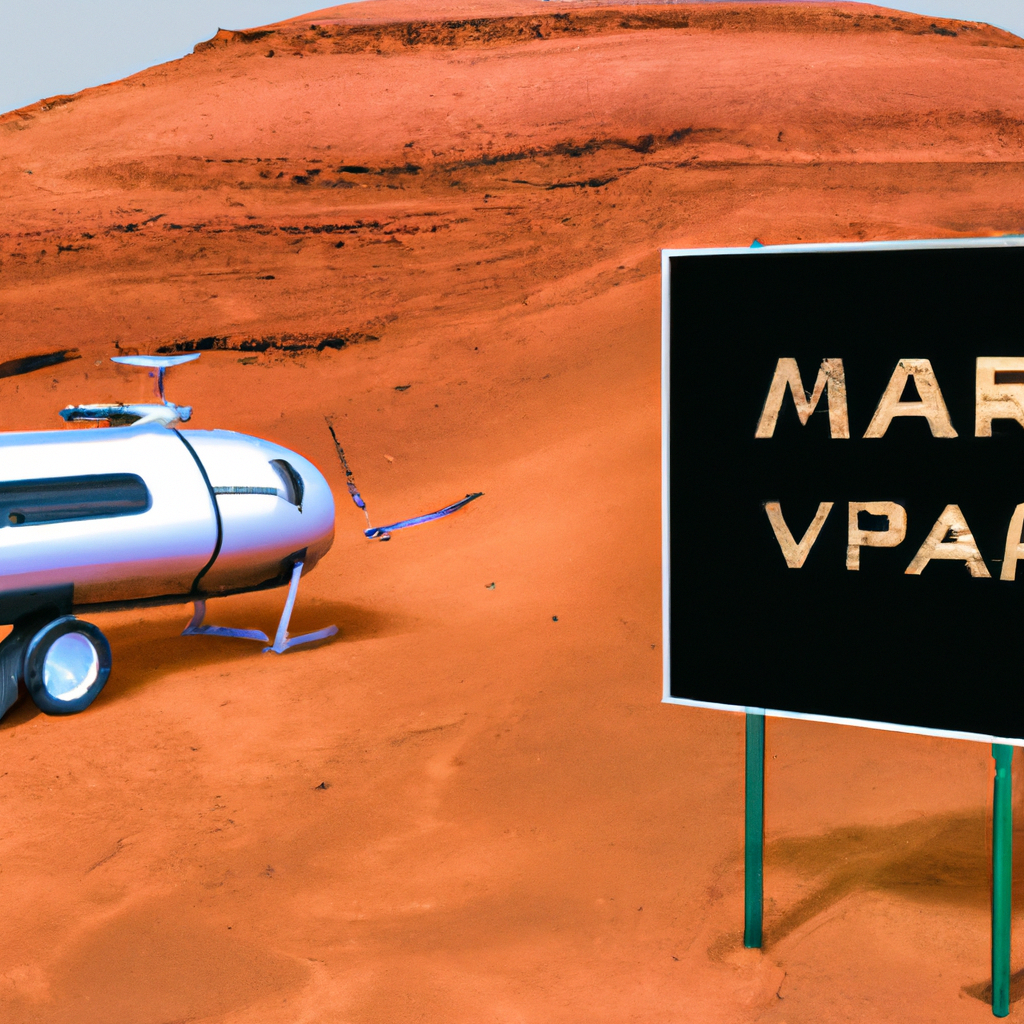

In [22]:
from IPython.display import Image

local_image = blogger.artist.save_image(url=image_url, description=image_description, folder='generated')
post.set_feature_image(local_image)
Image(filename='generated/' + local_image)

### Publish
Final step in our authoring flow is to generate the blog post as HTML. Note that for Auto-Demo we have attempted to keep the text and features of the blog post minimal to avoid a scrolling output. Some of the styles of the generated HTML conflict with the Jupyter Notebook styles so the notebook rendered HTML may not look same as browser rendered.

> This last step is somewhat magical in the Auto-Demo mode. Re-run the notebook a few times to see that no two blog posts are exactly the same, ever!

Our final step is to generate a local copy of HTML and Markdown formats of the blog post so that we can integrate this will our blog system of choice.

NOTE: When rendering the HTML in Jupyter notebook the image won't show up as it looks for a local copy of the image instead of resolving to the `generated` folder. View the generated HTML in brower to see the complete post with image.

In [23]:
from IPython.core.display import HTML
post_html = blogger.generate_html(post)
HTML(post_html)

In [24]:
html_path, markdown_path = blogger.publish(post_html=post_html, 
                                           filename='-'.join(post.get_keywords()), 
                                           folder='generated')
print(html_path, markdown_path)

Mars-Earth-Travel-20230119214611.html Mars-Earth-Travel-20230119214611.md
